# Churn Prediction Using Artificial Neural Network (ANN)

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv("churns.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9362,9363,15701972,Parsons,684,France,Male,35,3,137179.39,1,1,1,37264.11,0
5529,5530,15812647,Yin,691,France,Male,34,8,133936.04,2,1,0,91359.79,0
9449,9450,15615444,Y?an,663,Germany,Male,28,8,123674.28,2,1,1,87985.20,0
5960,5961,15728917,Gill,598,France,Male,48,6,120682.53,1,1,0,30635.52,1
2338,2339,15806307,Favors,537,France,Male,37,3,0.00,2,1,1,20603.32,0


In [23]:
df.shape

(10000, 12)

In [3]:
df.drop(['RowNumber',"CustomerId"],axis='columns',inplace=True)

In [4]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.nunique()

Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [7]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [8]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


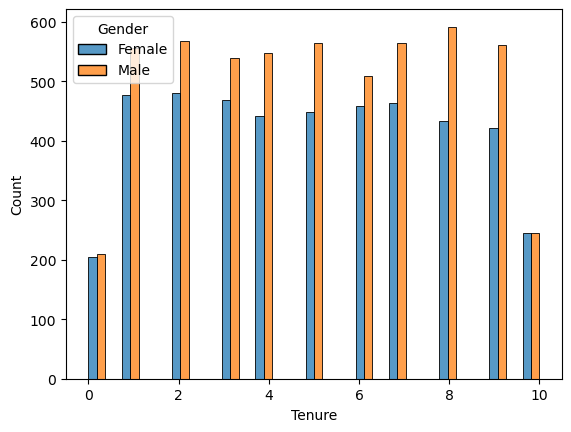

In [9]:
# plot histogram between tenure and gender 
import matplotlib.pyplot as plt 
sns.histplot(data=df, x='Tenure', hue='Gender',multiple="dodge") 
plt.show()

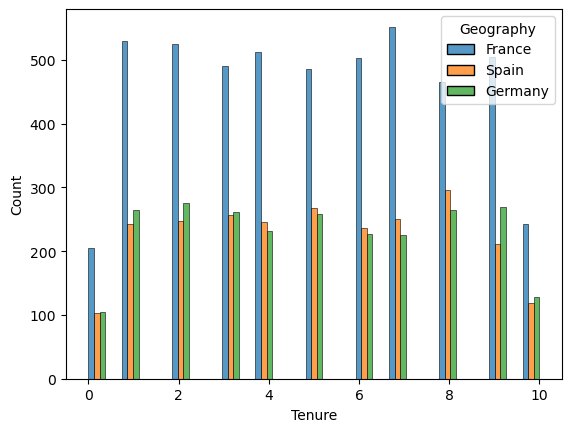

In [10]:
# plot the histogram between tenure and geography 
import matplotlib.pyplot as plt 
sns.histplot(data=df, x='Tenure', hue='Geography',multiple="dodge") 
plt.show()

In [11]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df.Gender.unique()

array([1, 0], dtype=int64)

# Apply Label Encoder 

In [12]:
from sklearn.preprocessing import LabelEncoder 
Surname=LabelEncoder()
Geography=LabelEncoder()
df['Surname']=Surname.fit_transform(df['Surname'])
df['Geography']=Geography.fit_transform(df['Geography'])

In [13]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
cols_to_scale = ['Surname', 'CreditScore','Age','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [16]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.380416,0.538,0,1,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.401569,0.516,2,1,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.696008,0.304,0,1,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.098601,0.698,0,1,0.283784,1,0.000000,2,0,0,0.469120,0
4,0.621631,1.000,2,1,0.337838,2,0.500246,1,1,1,0.395400,0


In [17]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
x=df.drop(['Exited'],axis='columns')
y=df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [24]:
len(x_train)

8000

# Build The ANN Model 

In [25]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
   keras.layers.Dense(9, input_shape=(11,), activation='relu'),
   keras.layers.Dense(1, activation='sigmoid') 
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3782 - loss: 1.6162
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.5120
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.5029
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7894 - loss: 0.5027
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.4851
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.4816
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.4738
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.4714
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4666
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7922 - loss: 0.4693


In [26]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.4623


[0.4590170681476593, 0.8029999732971191]

In [27]:
yp = model.predict(x_test)
yp[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.2801646 ],
       [0.27295104],
       [0.13149074],
       [0.20497265],
       [0.1891337 ],
       [0.23041518],
       [0.09562322],
       [0.19704686],
       [0.10127709],
       [0.25773305]], dtype=float32)

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
y_test[:10]

1631    1
932     0
6239    0
7619    0
603     1
4599    0
6233    0
7092    0
2083    0
8009    0
Name: Exited, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1597
           1       0.80      0.03      0.06       403

    accuracy                           0.80      2000
   macro avg       0.80      0.51      0.47      2000
weighted avg       0.80      0.80      0.72      2000



Text(33.22222222222222, 0.5, 'Truth')

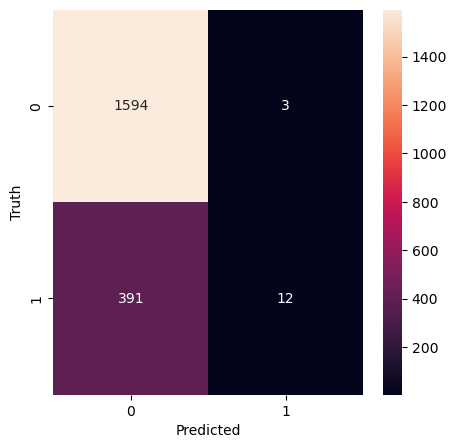

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')